<a href="https://colab.research.google.com/github/AuraFrizzati/ChatGPT-Prompt-Engineering-for-Developers/blob/main/05_Transforming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transforming**
In this notebook, we will explore how to use Large Language Models for **text transformation tasks** such as **language translation**, **spelling** and **grammar checking**, **tone adjustment**, and **format conversion** (e.g. from HTML to JSON).

## **Setup**

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

## **Translation**

ChatGPT is trained with sources in many languages. This gives the model the ability to do translation. Here are some examples of how to use this capability.

In [ ]:
prompt = f"""
Translate the following English text to Spanish: \ 
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)

`Hola, me gustaría ordenar una licuadora.`

In [ ]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)

`This is French.`

In [ ]:
prompt = f"""
Translate the following  text to French and Spanish
and English pirate: \
```I want to order a basketball```
"""
response = get_completion(prompt)
print(response)

```
French pirate: ```Je veux commander un ballon de basket```
Spanish pirate: ```Quiero pedir una pelota de baloncesto```
English pirate: ```I want to order a basketball``
```

In [ ]:
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms: 
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)

```
Formal: ¿Le gustaría ordenar una almohada?
Informal: ¿Te gustaría ordenar una almohada?
```

## **Universal Translator**
Imagine you are in charge of IT at a large multinational e-commerce company. Users are messaging you with IT issues in all their native languages. Your staff is from all over the world and speaks only their native languages. You need a universal translator!

In [ ]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
] 

In [ ]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English \
    and Korean: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

```
Original message (This is French.): La performance du système est plus lente que d'habitude.
English: The system performance is slower than usual.
Korean: 시스템 성능이 평소보다 느립니다. 

Original message (This is Spanish.): Mi monitor tiene píxeles que no se iluminan.
English: My monitor has pixels that don't light up.
Korean: 내 모니터에는 불이 켜지지 않는 픽셀이 있습니다. 

Original message (This is Italian.): Il mio mouse non funziona
English: My mouse is not working.
Korean: 내 마우스가 작동하지 않습니다. 

Original message (This is Polish.): Mój klawisz Ctrl jest zepsuty
English: My Ctrl key is broken.
Korean: 제 Ctrl 키가 고장 났어요. 

Original message (This is Chinese (Simplified).): 我的屏幕在闪烁
English: My screen is flickering.
Korean: 내 화면이 깜빡입니다. 

```

In [ ]:
for issue in user_messages:
    prompt = f"""
    Translate the text between curly brackets to English \
    and Korean. Format your \ 
    answer in JSON with the English name of the language as key\
    and the sentence as value. Make sure to return the sentence \
    in all three languages, the original one and both English \
    and Korean translations. Following this format: \
    "English name of input language": "input sentence" \
    "English": "English translation" \
    "Korean": "Korean translation" \
    ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

```
{
    "French": "La performance du système est plus lente que d'habitude.",
    "English": "The system performance is slower than usual.",
    "Korean": "시스템 성능이 평소보다 느립니다."
} 

{
    "Spanish": "Mi monitor tiene píxeles que no se iluminan.",
    "English": "My monitor has pixels that don't light up.",
    "Korean": "내 모니터에는 불이 켜지지 않는 픽셀이 있습니다."
} 

{
    "Italian": "Il mio mouse non funziona",
    "English": "My mouse is not working",
    "Korean": "마우스가 작동하지 않습니다"
} 

{
    "Polish": "Mój klawisz Ctrl jest zepsuty",
    "English": "My Ctrl key is broken",
    "Korean": "제 Ctrl 키가 고장 났어요"
} 

{
    "Chinese": "我的屏幕在闪烁",
    "English": "My screen is flickering",
    "Korean": "화면이 깜빡입니다"
} 
```

## **Tone Transformation**
Writing can vary based on the **intended audience**. ChatGPT can produce **different tones**.

In [ ]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)

```
Dear Sir/Madam,

I am writing to bring to your attention a standing lamp that I believe may be of interest to you. Please find attached the specifications for your review.

Thank you for your time and consideration.

Sincerely,

Joe
```

## **Format Conversion**
ChatGPT can translate between formats. The prompt should describe the input and output formats (e.g. HTML, JSON, XML, markdown).

In [ ]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

In [ ]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

<table>
  <caption>Restaurant Employees</caption>
  <thead>
    <tr>
      <th>Name</th>
      <th>Email</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Shyam</td>
      <td>shyamjaiswal@gmail.com</td>
    </tr>
    <tr>
      <td>Bob</td>
      <td>bob32@gmail.com</td>
    </tr>
    <tr>
      <td>Jai</td>
      <td>jai87@gmail.com</td>
    </tr>
  </tbody>
</table>


## **Spellcheck/Grammar check**.
Here are some examples of common grammar and spelling problems and the LLM's response.

To signal to the LLM that you want it to **proofread** your text, you instruct the model to 'proofread' or 'proofread and correct'.

In [ ]:
text = [ 
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use 
    any punctuation around the text:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)

```
The girl with the black and white puppies has a ball.
No errors found.
It's going to be a long day. Does the car need its oil changed?
Their goes my freedom. There going to bring they're suitcases.

Corrected version: 
There goes my freedom. They're going to bring their suitcases.
You're going to need your notebook.
That medicine affects my ability to sleep. Have you heard of the butterfly effect?
This phrase is to check ChatGPT for spelling ability.
```

In [ ]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

```
I got this for my daughter's birthday because she keeps taking mine from my  
 room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I think there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.
```

In [ ]:
from redlines import Redlines

diff = Redlines(text,response)
display(Markdown(diff.output_markdown))

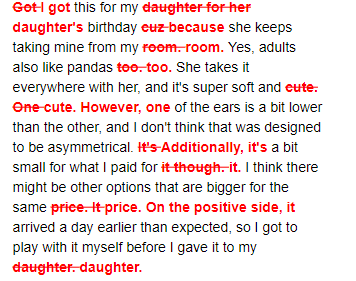

In [ ]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 
Output in markdown format.
Text: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))


`Title: A Soft and Cute Panda Plush Toy for All Ages`

`Introduction: As a parent, finding the perfect gift for your child's birthday can be a daunting task. However, I stumbled upon a soft and cute panda plush toy that not only made my daughter happy but also brought joy to me as an adult. In this review, I will share my experience with this product and provide an honest assessment of its features.`

`Product Description: The panda plush toy is made of high-quality materials that make it super soft and cuddly. Its cute design is perfect for children and adults alike, making it a versatile gift option. The toy is small enough to carry around, making it an ideal companion for your child on their adventures.`

`Pros: The panda plush toy is incredibly soft and cute, making it an excellent gift for children and adults. Its small size makes it easy to carry around, and its design is perfect for snuggling. The toy arrived a day earlier than expected, which was a pleasant surprise.`

`Cons: One of the ears is a bit lower than the other, which makes the toy asymmetrical. Additionally, the toy is a bit small for its price, and there might be other options that are bigger for the same price.`

`Conclusion: Overall, the panda plush toy is an excellent gift option for children and adults who love cute and cuddly toys. Despite its small size and asymmetrical design, the toy's softness and cuteness make up for its shortcomings. I highly recommend this product to anyone looking for a versatile and adorable gift option.`
